# 1. Import packages

In [1]:
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import gene selection modules
import gene_selection
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)

<module 'loci_1d_features' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\loci_1d_features.py'>

In [3]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

20244


# 2. Get all MERFISH loci (old codebook for example) with adjacent gene annotation

In [4]:
# load a pre-prepared adjacent gene dataframe for all MERFISH-loci
gene_fname = r"C:\Users\shiwei\Documents\AnalysisTool_Chromatin\resources\old_MERFISH_loci_adjacent_genes_tss.csv"

im_loci_df = pd.read_csv(gene_fname, index_col=0)

In [5]:
# Change column names to to be compatible with the gene score functions/pipelines below 
im_loci_df_new = im_loci_df[['name','id','chr','chr_order']]

dist_list = [0,10,50,100,500,1000,1500,2000]
adjacent_gene_cols = [f'adjacent_genes_{_dist}kb_tss' for _dist in dist_list]
for _col in adjacent_gene_cols:
    im_loci_df_new[_col.capitalize()]=im_loci_df[_col]

im_loci_df_new.head()

<ipython-input-5-3ad9719da169>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_loci_df_new[_col.capitalize()]=im_loci_df[_col]


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_11240000_11260000,1:11240000-11260000,4,1,5,intergenic,intergenic,intergenic,intergenic,A830018L16Rik; Prex2,A830018L16Rik; Cpa6; Gm15603; Gm15604; Gm7560;...,1700034P13Rik; A830018L16Rik; Arfgef1; Cops5; ...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_13740000_13760000,1:13740000-13760000,5,1,6,intergenic,intergenic,Gm5523,Gm5523; Lactb2,Gm5523; Gm7593; Lactb2; Ncoa2; Tram1,Eya1; Gm5523; Gm7593; Lactb2; Msc; Ncoa2; Slco...,Eya1; Gm17644; Gm2383; Gm5523; Gm6216; Gm7593;...,Eya1; Gm10566; Gm17644; Gm2383; Gm5523; Gm6216...


In [6]:
# sort codebook by chromosome order (optional)
im_loci_df_new = loci_1d_features.sort_loci_df_by_chr_order(im_loci_df_new)
im_loci_df_new.head()

,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...


# 3. Load AnnData for all gene expression information

In [7]:
# Get loaded adata that is pre-prepared from other notebook
#%store -r adata
import os
import scanpy as sc
# L drive below is the crick annData
scRNA_folder =r'L:\Shiwei\DNA_MERFISH_analysis\SMARTer_nuclei_MOp'
# load from here for saved h5ad
adata = sc.read(os.path.join(scRNA_folder,r'MOp_smart_sn_labeled_20220707.h5ad'))

In [8]:
# Use these three columns below for consistent labeling of our MERFISH data
adata.obs[['subclass_label_new','class_label_new','neuron_identity']]

,subclass_label_new,class_label_new,neuron_identity
barcode,,,
SM-GE653_S113_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S114_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S115_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S116_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S117_E1-50,Lamp5,GABA,Neuronal
...,...,...,...
SM-GE66H_S083_E1-50,L5/6 NP,Gluta,Neuronal
SM-GE66H_S084_E1-50,Vip,GABA,Neuronal
SM-GE66H_S085_E1-50,Pvalb,GABA,Neuronal


In [12]:
cellgroup_list = np.unique(adata.obs['class_label_new'].tolist())
cellgroup_list

array(['Astro', 'Endo', 'GABA', 'Gluta', 'Micro', 'Oligo'], dtype='<U5')

# 4. Add cell types of interest for their transcirption activity around the MERFISH loci

## 4.1 Append all cell types as the compared groups (matching the correct groupby level)

In [13]:
# add the Groupby and Compared_group keys manually here, which will be used for retrieving transcription acitvity, etc
marker_genes_df = im_loci_df_new.copy()


# Groupby means the hierachy-level to be used for calling cell groups; see options in the box above
# here we use class-level as example
marker_genes_df['Groupby'] ='class_label_new'

# this function should support a list of cell groups as well
# just add a list of cellgroups (separate by '; ') to the 'Compared_groups' col

marker_genes_df['Compared_groups'] ='; '.join(cellgroup_list)
print('; '.join(cellgroup_list))
marker_genes_df.head()

Astro; Endo; GABA; Gluta; Micro; Oligo


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss,Groupby,Compared_groups
loci_name,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo


In [15]:
# import gene selection modules to get the activity score for example
import gene_selection
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)

#from gene_activity import gene_activity_score_gene_dataframe
from gene_activity import gene_activity_average_gene_dataframe
#from gene_activity import gene_activity_pts_gene_dataframe


# use these three columns existing in the gene_dataframe as example
adjacent_gene_cols = ['Adjacent_genes_0kb_tss',
                      'Adjacent_genes_100kb_tss',
                      'Adjacent_genes_1000kb_tss']


#adjacent_gene_cols = [_c.lower() for _c in adjacent_gene_cols]

for _col in adjacent_gene_cols[:1]:
    print (f'Process for {_col}')
    # get gene activity for genes from each column above for each compared cell types
    marker_genes_df= gene_activity_average_gene_dataframe (marker_genes_df, 
                                        adata, 
                                        adjacent_gene_col = _col,
                                        #stat_method = 'wilcoxon',
                                        report_type = 'sum',  # summing all genes' mean count
                                        parallel=False, 
                                        num_threads = 8)
    
marker_genes_df    

Process for Adjacent_genes_0kb_tss
Looping for gene acitivity calculation:
Complete in 75.389s.


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss,Groupby,Compared_groups,Activity_average_sum_genes_0kb_tss: Astro,Activity_average_sum_genes_0kb_tss: Endo,Activity_average_sum_genes_0kb_tss: GABA,Activity_average_sum_genes_0kb_tss: Gluta,Activity_average_sum_genes_0kb_tss: Micro,Activity_average_sum_genes_0kb_tss: Oligo
loci_name,,,,,,,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,3.436225,1.0,1.000000,1.055930,10.902639,1.000000
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,12.192850,2.0,9.370182,29.008308,21.882450,83.237625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_166240000_166260000,X:166240000-166260000,1059,X,59,intergenic,Gpm6b,Gpm6b,Gemin8; Gpm6b,Egfl6; Gemin8; Gm15223; Gm15225; Gm1720; Gpm6b...,Egfl6; Gemin8; Glra2; Gm15223; Gm15225; Gm1523...,Egfl6; Fancb; Gemin8; Glra2; Gm15223; Gm15225;...,Asb11; Asb9; Bmx; Egfl6; Fancb; Gemin8; Glra2;...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chrX_167122110_167191320,X:167122110-167191320,2052,X,60,intergenic,intergenic,Gm15232; Tmsb4x,Gm15232; Gm8814; Tmsb4x,Gm15230; Gm15232; Gm1720; Gm8814; Prps2; Tlr7;...,Egfl6; Gemin8; Gm15223; Gm15230; Gm15232; Gm15...,Egfl6; Frmpd4; Gemin8; Gm15223; Gm15225; Gm152...,Amelx; Arhgap6; Egfl6; Frmpd4; Gemin8; Glra2; ...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chrX_168740000_168760000,X:168740000-168760000,1060,X,61,intergenic,intergenic,Arhgap6,Arhgap6; Msl3,Amelx; Arhgap6; Frmpd4; Msl3,Amelx; Arhgap6; Frmpd4; Gm15238; Gm15240; Hccs...,Amelx; Arhgap6; Erdr1; Frmpd4; G530011O06Rik; ...,Amelx; Arhgap6; Asmt; Erdr1; Frmpd4; G530011O0...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [16]:
# the calculated genes score will be something like 'Activity_average_sum_genes_0kb_tss: cellgroupA' and 'Activity_average_sum_genes_0kb_tss: cellgroupB'
marker_genes_df.columns

Index(['name', 'id', 'chr', 'chr_order', 'Adjacent_genes_0kb_tss',
       'Adjacent_genes_10kb_tss', 'Adjacent_genes_50kb_tss',
       'Adjacent_genes_100kb_tss', 'Adjacent_genes_500kb_tss',
       'Adjacent_genes_1000kb_tss', 'Adjacent_genes_1500kb_tss',
       'Adjacent_genes_2000kb_tss', 'Groupby', 'Compared_groups',
       'Activity_average_sum_genes_0kb_tss: Astro',
       'Activity_average_sum_genes_0kb_tss: Endo',
       'Activity_average_sum_genes_0kb_tss: GABA',
       'Activity_average_sum_genes_0kb_tss: Gluta',
       'Activity_average_sum_genes_0kb_tss: Micro',
       'Activity_average_sum_genes_0kb_tss: Oligo'],
      dtype='object')

## 4.2 Log10 the result if desired

In [20]:
from gene_activity import log_gene_activity 

_bin_size = 0
cols_to_be_log = [f'Activity_average_sum_genes_{_bin_size}kb_tss' for _g in cellgroup_list]
                  
for _col in cols_to_be_log:                  
            
    marker_genes_df_log = log_gene_activity (marker_genes_df, 
                             gene_activity_col = _col,
                             log_method = np.log10, 
                            log1p=True,
                            )
    
marker_genes_df_log

,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,...,Activity_average_sum_genes_0kb_tss: GABA,Activity_average_sum_genes_0kb_tss: Gluta,Activity_average_sum_genes_0kb_tss: Micro,Activity_average_sum_genes_0kb_tss: Oligo,Log10_Activity_average_sum_genes_0kb_tss: Astro,Log10_Activity_average_sum_genes_0kb_tss: Endo,Log10_Activity_average_sum_genes_0kb_tss: GABA,Log10_Activity_average_sum_genes_0kb_tss: Gluta,Log10_Activity_average_sum_genes_0kb_tss: Micro,Log10_Activity_average_sum_genes_0kb_tss: Oligo
loci_name,,,,,,,,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,...,1.000000,1.055930,10.902639,1.000000,0.647014,0.301030,0.301030,0.313008,1.075643,0.301030
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,...,9.370182,29.008308,21.882450,83.237625,1.120339,0.477121,1.015786,1.477242,1.359503,1.925506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_166240000_166260000,X:166240000-166260000,1059,X,59,intergenic,Gpm6b,Gpm6b,Gemin8; Gpm6b,Egfl6; Gemin8; Gm15223; Gm15225; Gm1720; Gpm6b...,Egfl6; Gemin8; Glra2; Gm15223; Gm15225; Gm1523...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chrX_167122110_167191320,X:167122110-167191320,2052,X,60,intergenic,intergenic,Gm15232; Tmsb4x,Gm15232; Gm8814; Tmsb4x,Gm15230; Gm15232; Gm1720; Gm8814; Prps2; Tlr7;...,Egfl6; Gemin8; Gm15223; Gm15230; Gm15232; Gm15...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chrX_168740000_168760000,X:168740000-168760000,1060,X,61,intergenic,intergenic,Arhgap6,Arhgap6; Msl3,Amelx; Arhgap6; Frmpd4; Msl3,Amelx; Arhgap6; Frmpd4; Gm15238; Gm15240; Hccs...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 4.3 Inspect the result

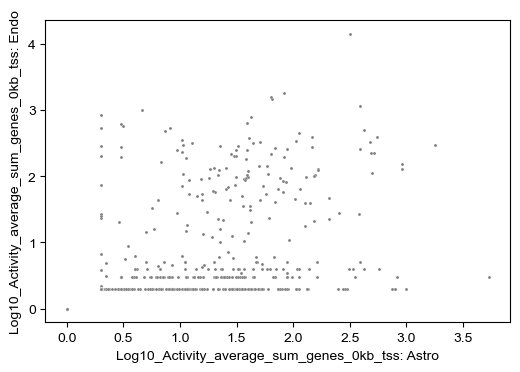

In [22]:
%matplotlib inline

for ext_dist in [0]:

    fig, ax = plt.subplots(1, 1,dpi=100)

    x_col = f'Log10_Activity_average_sum_genes_{ext_dist}kb_tss: {cellgroup_list[0]}'
    y_col = f'Log10_Activity_average_sum_genes_{ext_dist}kb_tss: {cellgroup_list[1]}'
    ax = sns.scatterplot(data=marker_genes_df_log, 
                x=x_col,
                y=y_col, s=5,color='gray')

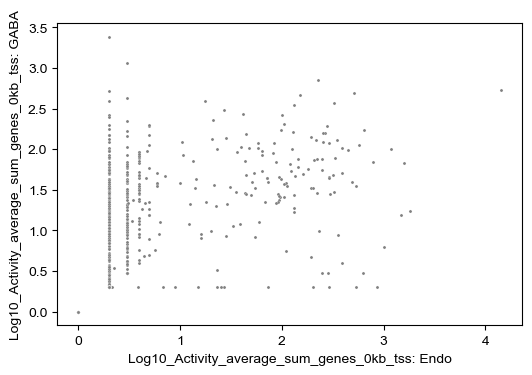

In [24]:
%matplotlib inline

for ext_dist in [0]:

    fig, ax = plt.subplots(1, 1,dpi=100)

    x_col = f'Log10_Activity_average_sum_genes_{ext_dist}kb_tss: {cellgroup_list[1]}'
    y_col = f'Log10_Activity_average_sum_genes_{ext_dist}kb_tss: {cellgroup_list[2]}'
    ax = sns.scatterplot(data=marker_genes_df_log, 
                x=x_col,
                y=y_col, s=5,color='gray')

# 5. Loop for different bin size and save the result

In [29]:
# define save_path;

save_folder= r'\\10.245.74.158\Chromatin_NAS_5\Temp_file_transfer\AnalysisTool_Chromatin\resources\transcription_mean_counts_all_class_labels'

In [14]:
# get all avalibale bin sizes
gene_info_cols = [_col for _col in im_loci_df_new.columns if 'Adjacent' in _col]
gene_info_cols


['Adjacent_genes_0kb_tss',
 'Adjacent_genes_10kb_tss',
 'Adjacent_genes_50kb_tss',
 'Adjacent_genes_100kb_tss',
 'Adjacent_genes_500kb_tss',
 'Adjacent_genes_1000kb_tss',
 'Adjacent_genes_1500kb_tss',
 'Adjacent_genes_2000kb_tss']

In [15]:
marker_genes_df = im_loci_df_new.copy()

# Groupby means the hierachy-level to be used for calling cell groups; see options in the box above
# here we use class-level as example
marker_genes_df['Groupby'] ='class_label_new'

# this function should support a list of cell groups as well
# just add a list of cellgroups (separate by '; ') to the 'Compared_groups' col

marker_genes_df['Compared_groups'] ='; '.join(cellgroup_list)
print('; '.join(cellgroup_list))
marker_genes_df.head()


Astro; Endo; GABA; Gluta; Micro; Oligo


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss,Groupby,Compared_groups
loci_name,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Astro; Endo; GABA; Gluta; Micro; Oligo


In [30]:
# run loop to process and save all results
import gene_activity
importlib.reload(gene_activity)
from gene_activity import gene_activity_average_gene_dataframe
from gene_activity import log_gene_activity 

for _col in gene_info_cols:

    print (f'Process for {_col}')
    # get gene activity for genes from each column above for each compared cell types
    print ('Append gene mean count for all query cell types.')
    marker_genes_df_new= gene_activity_average_gene_dataframe (marker_genes_df, 
                                        adata, 
                                        adjacent_gene_col = _col,
                                        #stat_method = 'wilcoxon',
                                        report_type = 'sum',  # summing all genes' mean count
                                        parallel=False, 
                                        num_threads = 8)
    
    
    # get the log10 for the mean count
    _bin_size = _col.split('_')[2].split('kb')[0]
    cols_to_be_log = [f'Activity_average_sum_genes_{_bin_size}kb_tss' for _g in cellgroup_list]
    print ('Append the log10 value for all gene mean count columns.')            
    for _log_col in cols_to_be_log:                  

        marker_genes_df_log = log_gene_activity (marker_genes_df_new, 
                                 gene_activity_col = _log_col,
                                 log_method = np.log10, 
                                 log1p=True,
                                )
        
        
    # save the processed dataframe
    print ('Save the result.')     
    save_fname = os.path.join(save_folder, f'MERFISH_loci_class_level_label_transcription_sum_{_bin_size}kb_tss.csv')
    marker_genes_df_log.to_csv(save_fname)
    
    
    

Process for Adjacent_genes_0kb_tss
Append gene mean count for all query cell types.
Looping for gene acitivity calculation:
Complete in 73.162s.
Append the log10 value for all gene mean count columns.
Save the result.
Process for Adjacent_genes_10kb_tss
Append gene mean count for all query cell types.
Looping for gene acitivity calculation:
Complete in 73.733s.
Append the log10 value for all gene mean count columns.
Save the result.
Process for Adjacent_genes_50kb_tss
Append gene mean count for all query cell types.
Looping for gene acitivity calculation:
Complete in 74.284s.
Append the log10 value for all gene mean count columns.
Save the result.
Process for Adjacent_genes_100kb_tss
Append gene mean count for all query cell types.
Looping for gene acitivity calculation:
Complete in 75.094s.
Append the log10 value for all gene mean count columns.
Save the result.
Process for Adjacent_genes_500kb_tss
Append gene mean count for all query cell types.
Looping for gene acitivity calculation

# 6. Load one dataframe to check

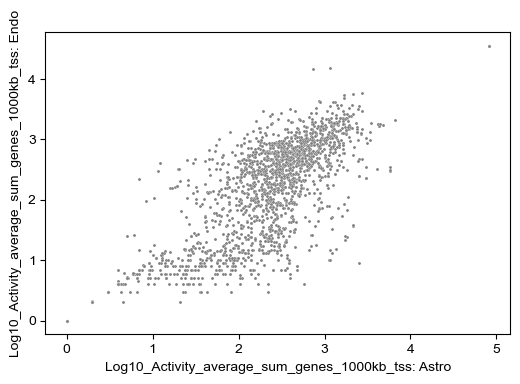

In [31]:
# check 1000kb for example
_bin_size = 1000
save_fname = os.path.join(save_folder, f'MERFISH_loci_class_level_label_transcription_sum_{_bin_size}kb_tss.csv')
df_check = pd.read_csv(save_fname)

%matplotlib inline


fig, ax = plt.subplots(1, 1,dpi=100)

x_col = f'Log10_Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[0]}'
y_col = f'Log10_Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[1]}'
ax = sns.scatterplot(data=df_check, 
            x=x_col,
            y=y_col, s=5,color='gray')

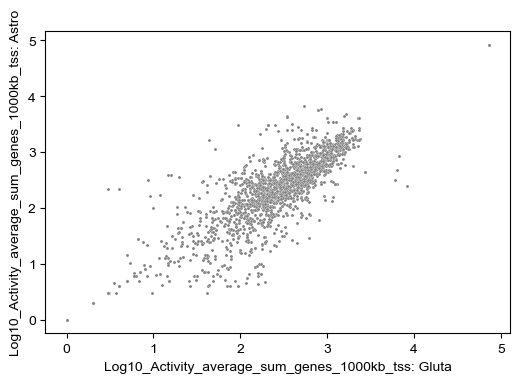

In [33]:
# check 1000kb for example
_bin_size = 1000
save_fname = os.path.join(save_folder, f'MERFISH_loci_class_level_label_transcription_sum_{_bin_size}kb_tss.csv')
df_check = pd.read_csv(save_fname)

%matplotlib inline


fig, ax = plt.subplots(1, 1,dpi=100)

x_col = f'Log10_Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[3]}'
y_col = f'Log10_Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[0]}'
ax = sns.scatterplot(data=df_check, 
            x=x_col,
            y=y_col, s=5,color='gray')

(0.0, 4479.9314257025735)

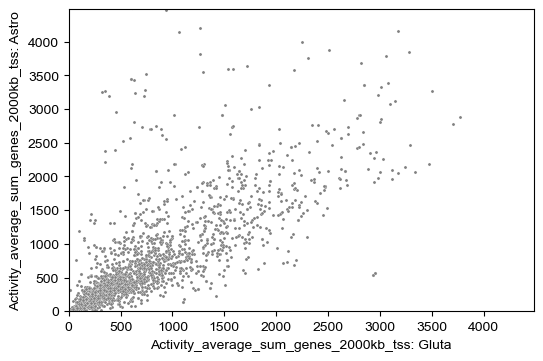

In [36]:
# check 1000kb for example
_bin_size = 2000
save_fname = os.path.join(save_folder, f'MERFISH_loci_class_level_label_transcription_sum_{_bin_size}kb_tss.csv')
df_check = pd.read_csv(save_fname)

%matplotlib inline


fig, ax = plt.subplots(1, 1,dpi=100)

x_col = f'Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[3]}'
y_col = f'Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[0]}'
ax = sns.scatterplot(data=df_check, 
            x=x_col,
            y=y_col, s=5,color='gray')

xs = df_check[x_col].tolist()
ys = df_check[y_col].tolist()
ax_lim=np.max([np.percentile(xs,99),np.percentile(ys,99)])
plt.xlim([0,ax_lim])
plt.ylim([0,ax_lim])

(0.0, 5679.99164996148)

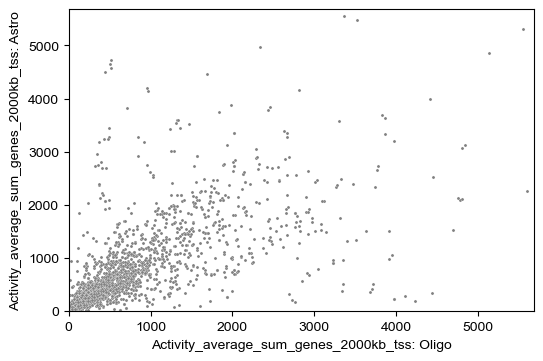

In [37]:
# check 1000kb for example
_bin_size = 2000
save_fname = os.path.join(save_folder, f'MERFISH_loci_class_level_label_transcription_sum_{_bin_size}kb_tss.csv')
df_check = pd.read_csv(save_fname)

%matplotlib inline


fig, ax = plt.subplots(1, 1,dpi=100)

x_col = f'Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[5]}'
y_col = f'Activity_average_sum_genes_{_bin_size}kb_tss: {cellgroup_list[0]}'
ax = sns.scatterplot(data=df_check, 
            x=x_col,
            y=y_col, s=5,color='gray')

xs = df_check[x_col].tolist()
ys = df_check[y_col].tolist()
ax_lim=np.max([np.percentile(xs,99),np.percentile(ys,99)])
plt.xlim([0,ax_lim])
plt.ylim([0,ax_lim])